# 轴向振动模式

## 求解平衡位置

$u_{j}-\sum_{n=1}^{j-1}1/(u_{j}-u_{n})^{2}+\sum_{n=j+1}^{N}1/(u_{j}-u_{n})^{2}=0,$
$u_{n}\equiv z_{n}^{0}/\ell$ $(n=1,2,\dots,N),$
where $\ell\equiv\sqrt[3]{e^{2}/4\pi\epsilon_{0}M\omega_{z}^{2}}$

In [30]:
import numpy as np
from scipy.optimize import fsolve
def position(x):
    n = len(x)
    e = np.zeros(n) #n个平衡方程
    for i in range(1,n-1):
        for j in range(0,i):
            e[i] = e[i] - 1/(x[i]-x[j])**2
        for k in range(i+1,n):
            e[i] = e[i] + 1/(x[i]-x[k])**2
        e[i] = e[i] + x[i]
    for i in range(1,n):
        e[0] = e[0] + 1/(x[0]-x[i])**2
    e[0] = e[0] + x[0]
    for i in range(0,n-1):
        e[n-1] = e[n-1] - 1/(x[n-1]-x[i])**2
    e[n-1] = e[n-1] + x[n-1]    
    return(np.array(e))
result = fsolve(position, [0,1,2,3])
print(result)

[-1.43680199 -0.45437928  0.45437928  1.43680199]


## 求解轴向频率分布

In [31]:
def frequence_z(n):
    A = np.zeros((n,n)) #展开矩阵
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
                A[i][j] = -2/abs(u[i]-u[j])**3
                A[i][i] = A[i][i] + 2/abs(u[i]-u[j])**3
        A[i][i] = A[i][i]+1
    a,b = np.linalg.eig(A)
    return a,b
frequence_z(5)

(array([13.47483722,  9.33215334,  1.        ,  5.81769615,  3.        ]),
 array([[ 1.04540031e-01, -3.01657935e-01,  4.47213595e-01,
         -5.37653589e-01, -6.39533025e-01],
        [-4.70436679e-01,  6.39533025e-01,  4.47213595e-01,
          2.80516188e-01, -3.01657935e-01],
        [ 7.31793295e-01,  3.38840968e-10,  4.47213595e-01,
          5.14274803e-01, -1.45685508e-10],
        [-4.70436678e-01, -6.39533025e-01,  4.47213595e-01,
          2.80516187e-01,  3.01657935e-01],
        [ 1.04540031e-01,  3.01657935e-01,  4.47213595e-01,
         -5.37653589e-01,  6.39533025e-01]]))

## 求解径向运动模式

In [32]:
# 求解径向频率分布
def frequence_r(n,b):  # b为w_x/w_z
    A = np.zeros((n,n)) #展开矩阵
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
                A[i][j] = 1/abs(u[i]-u[j])**3
                A[i][i] = A[i][i] - 1/abs(u[i]-u[j])**3
        A[i][i] = A[i][i] + b**2
    a,b = np.linalg.eig(A)
    return a,b
frequence_r(10,5)

(array([ 3.87974523,  7.36918846, 10.60407101, 13.57586328, 16.27430131,
        25.        , 24.        , 22.57943653, 18.68663383, 20.79619695]),
 array([[ 0.00179463, -0.0090231 , -0.03062055,  0.08045994, -0.17212649,
          0.31622777, -0.51455594,  0.54762296, -0.30586578, -0.45239786],
        [-0.0256007 ,  0.093714  ,  0.2231854 , -0.39020946,  0.50982608,
          0.31622777, -0.37640172,  0.13816365,  0.46889772,  0.21893377],
        [ 0.13402699, -0.33796684, -0.50504953,  0.45280594, -0.12668232,
          0.31622777, -0.25996093, -0.10787523,  0.26288425,  0.3785943 ],
        [-0.36558792,  0.54187304,  0.3077563 ,  0.17946679, -0.39592868,
          0.31622777, -0.15302812, -0.25437207, -0.09726317,  0.30241429],
        [ 0.58968095, -0.2885971 ,  0.31537547, -0.32252322, -0.19401523,
          0.31622777, -0.0505632 , -0.32353931, -0.32865302,  0.11232159],
        [-0.58968095, -0.2885971 , -0.31537547, -0.32252322,  0.19401523,
          0.31622777,  0.0505632 

### 第k个离子只加上径向局域势

In [33]:
# 求解径向频率分布的改变
def frequence_x(n,b,k,b1):  # b为w_r/w_z，第k个离子加上了局域势
    A = np.zeros((n,n)) #展开矩阵
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
                A[i][j] = 1/abs(u[i]-u[j])**3
                A[i][i] = A[i][i] - 1/abs(u[i]-u[j])**3
        A[i][i] = A[i][i] + b**2
    A[k][k] = A[k][k] + b1**2 
    a,b = np.linalg.eig(A)
    return a,b
frequence_x(3,5,2,1)

(array([22.70874062, 24.35224188, 25.5390175 ]),
 array([[ 0.46666051, -0.83258101,  0.29839039],
        [-0.8444311 , -0.319108  ,  0.4302397 ],
        [ 0.26299064,  0.45274601,  0.8519724 ]]))

### 错误的理解，认为平衡位置会改变的推导

In [34]:
# 更复杂的情况，可以在轴向和径向都加上局域势，问题在于此时的平衡位置会发生改变
def Position(x,m,b1): #在第m个离子处加上轴向b1 = w_z'/w_z , b2 = w_r'/w_z
    n = len(x)
    e = np.zeros(n) #n个平衡方程
    for i in range(1,n-1):
        for j in range(0,i):
            e[i] = e[i] - 1/(x[i]-x[j])**2
        for k in range(i+1,n):
            e[i] = e[i] + 1/(x[i]-x[k])**2
        e[i] = e[i] + x[i]
    for i in range(1,n):
        e[0] = e[0] + 1/(x[0]-x[i])**2
    e[0] = e[0] + x[0]
    for i in range(0,n-1):
        e[n-1] = e[n-1] - 1/(x[n-1]-x[i])**2
    e[n-1] = e[n-1] + x[n-1]    
    e[m] = e[m] + x[m] * b1**2
    return(np.array(e))
result = fsolve(Position, [0,1,2,3],args=(1,10))
print(result)

[-1.15848458 -0.01260108  0.75839917  1.67279439]


In [35]:
def Frequence(n,m,b,b1,b2):#在第m个离子处加上轴向b1 = w_z'/w_z , b2 = w_r'/w_z , b=w_r/w_z
    A_z = np.zeros((n,n)) #展开矩阵
    A_r = np.zeros((n,n))
    u = fsolve(Position, np.linspace(0,n-1,n),(m,b1))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
                A_z[i][j] = -2/abs(u[i]-u[j])**3
                A_z[i][i] = A_z[i][i] + 2/abs(u[i]-u[j])**3
                A_r[i][j] = 1/abs(u[i]-u[j])**3
                A_r[i][i] = A_r[i][i] - 1/abs(u[i]-u[j])**3
        A_z[i][i] = A_z[i][i] + 1
        A_r[i][i] = A_r[i][i] + b**2
    A_z[m][m] = A_z[m][m] + b1**2
    A_r[m][m] = A_r[m][m] + b2**2 
    a_z,b_z = np.linalg.eig(A_z)
    a_r,b_r = np.linalg.eig(A_r)
    return a_z,b_z,a_r,b_r
Frequence(4,1,5,2,1)

(array([13.15734971,  6.86113076,  1.65389084,  3.04412195]),
 array([[ 0.11482788, -0.22986818,  0.53337684, -0.8059059 ],
        [-0.82232183,  0.4692364 ,  0.31943097, -0.03959631],
        [ 0.54645008,  0.64197696,  0.49092487,  0.21966037],
        [-0.1095157 , -0.56110909,  0.61029974,  0.54835858]]),
 array([20.32095896, 25.31637208, 23.01975552, 23.98466682]),
 array([[-0.08251648,  0.45099243,  0.48009833, -0.74786526],
        [ 0.512691  ,  0.62456149, -0.5864221 , -0.05639148],
        [-0.81055603,  0.486734  , -0.21387703,  0.24565331],
        [ 0.2708097 ,  0.41184801,  0.61633702,  0.61414331]]))

# 求解径向频率分布

$\begin{equation}
A_{nj}^{\xi}=\left\{ \begin{array}{ll}
\beta_{\xi}^{2}+\sum\limits _{p=1,p\not=j}^{N}a_{\xi}/|u_{j}-u_{p}|^{3} & (n=j)\\
-a_{\xi}/|u_{j}-u_{n}|^{3} & (n\not=j),
\end{array}\right.
\end{equation}$
with $\beta_{\xi}=\omega_{\xi}/\omega_{z}$, $a_{x}=a_{y}=-1$, and
$a_{z}=2$ 

## 只对第m个离子加上局域势的情形

In [36]:
# 求解径向频率分布
def Frequence_r(n,b,m,b1,b2):  # b为w_x/w_z
    A_z = np.zeros((n,n)) #展开矩阵
    A_r = np.zeros((n,n))
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
                A_z[i][j] = -2/abs(u[i]-u[j])**3
                A_z[i][i] = A_z[i][i] + 2/abs(u[i]-u[j])**3
                A_r[i][j] = 1/abs(u[i]-u[j])**3
                A_r[i][i] = A_r[i][i] - 1/abs(u[i]-u[j])**3
        A_z[i][i] = A_z[i][i] + 1
        A_r[i][i] = A_r[i][i] + b**2
    A_z[m][m] = A_z[m][m] + b1**2
    A_r[m][m] = A_r[m][m] + b2**2 
    a_z,b_z = np.linalg.eig(A_z)
    a_r,b_r = np.linalg.eig(A_r)
    return a_z,b_z,a_r,b_r

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
a = Frequence_r(10,10,2,0,0)
print(np.sqrt(np.sort(a[0])),np.sqrt(np.sort(a[2])))

[1.         1.73205081 2.41684235 3.06718211 3.69144042 4.29550898
 4.88346941 5.45819182 6.02176246 6.57575163] [ 8.88142698  9.07574727  9.25224681  9.41147509  9.55375849  9.6791856
  9.78755316  9.87823044  9.94987437 10.        ]


## 不加局域势情况下频率分布

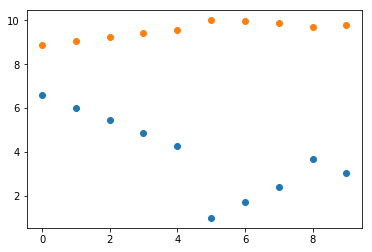

In [38]:
plt.plot(np.sqrt(a[0]),'o')
plt.plot(np.sqrt(a[2]),'o')

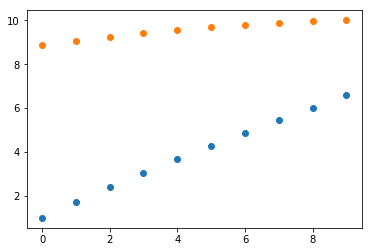

In [39]:
plt.plot(np.sqrt(np.sort(a[0])),'o')
plt.plot(np.sqrt(np.sort(a[2])),'o')

## 对第m1，m2个离子加上局域势的结果。b1，b3为轴向局域势，b2，b4为径向局域势

In [40]:
# 求解径向频率分布
def Frequence_rr(n,b,m1,m2,b1,b2,b3,b4):  # b为w_r/w_z
    A_z = np.zeros((n,n)) #展开矩阵
    A_r = np.zeros((n,n))
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
                A_z[i][j] = -2/abs(u[i]-u[j])**3
                A_z[i][i] = A_z[i][i] + 2/abs(u[i]-u[j])**3
                A_r[i][j] = 1/abs(u[i]-u[j])**3
                A_r[i][i] = A_r[i][i] - 1/abs(u[i]-u[j])**3
        A_z[i][i] = A_z[i][i] + 1
        A_r[i][i] = A_r[i][i] + b**2
    A_z[m1][m1] = A_z[m1][m1] + b1**2
    A_r[m1][m1] = A_r[m1][m1] + b2**2 
    A_z[m2][m2] = A_z[m2][m2] + b3**2
    A_r[m2][m2] = A_r[m2][m2] + b4**2 
    a_z,b_z = np.linalg.eig(A_z)
    a_r,b_r = np.linalg.eig(A_r)
    return a_z,b_z,a_r,b_r



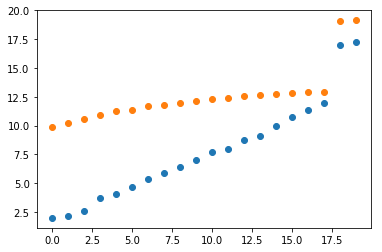

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
b = Frequence_rr(20,13,5,15,15,15,15,15)
plt.plot(np.sqrt(np.sort(b[0])),'o')
plt.plot(np.sqrt(np.sort(b[2])),'o')


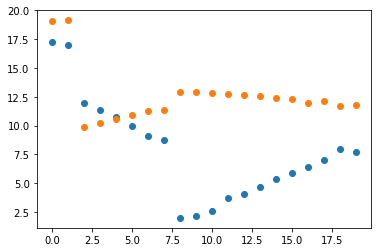

In [13]:
plt.plot(np.sqrt(b[0]),'o')
plt.plot(np.sqrt(b[2]),'o')

In [28]:
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 

def plot_func(t,b):
    F = Frequence_rr(10,b,4,5,t,t,t,t)
    plt.plot(np.sqrt(F[2]),'o')
    plt.ylim(0,50)
    
interact(plot_func, t = widgets.FloatSlider(value=5, 
               min=5, 
               max=100, 
               step=0.1),b = widgets.FloatSlider(value=5, 
               min=0, 
               max=50), 
               step=0.1)
plt.show()

interactive(children=(FloatSlider(value=5.0, description='t', min=5.0), FloatSlider(value=5.0, description='b'…

NameError: name 'plt' is not defined

# dipole force 谐振频率估计

In [42]:
from sympy import *
init_printing()
from scipy.constants import c as c0
from scipy.constants import m_p
from scipy.constants import hbar as h

m,c,omega0,Gamma,Delta,delta, I, w0,hbar,k,w,P = symbols('m, c, \omega_0, \Gamma,\Delta,\delta, I, w_0,\hbar,k,w,P ')
# omega0, 共振角频率
# w0     激光的半峰宽

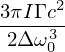

In [43]:
U_dip = 3*pi*c**2*Gamma*I/(2*omega0**3*Delta)
U_dip

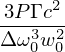

In [46]:
I_0 = 2*P/(pi*w0**2)
U_0 = U_dip.subs({I:I_0})
U_0

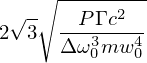

In [47]:
W_z = sqrt(4*U_0/(m*w0**2))
W_z

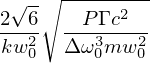

In [53]:
paras={
    Gamma: 20e6*2*pi,
    omega0: 2*pi*c/(0.369e-6),
    Delta: 2*pi*200e9,
    w0:    0.5e-6,
    m:     171*m_p,
    P:     1e-3,
    I:     1e-3/(pi*w0**2),
    delta: 2*pi*12.6e9,
    c:  c0,
    hbar: h,
    w: 2*pi*1e5,
    k: 2*pi/(0.369e-6)
}

V_x = N(W_x.subs(paras)/(2*pi))
V_x/1e6

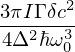

In [54]:
omega_j = U_dip * delta/(2*Delta*hbar)
N(omega_j.subs(paras))/1e9
omega_j

In [55]:
N(W_r.subs(paras))/1e6

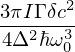

In [56]:
c_1 = U_dip * delta/(2*Delta*hbar)
c_1

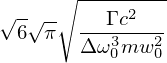

In [57]:
c_2 = sqrt(4*U_dip/(m*w0**2*I))
c_2

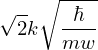

In [58]:
c_3 = 2*k*sqrt(hbar/(2*m*w))
c_3

# 对门进行优化

## 计算某一光强下$\Omega_{j}$,$\omega_{r}$,$\omega_{z}$,符号计算一些常数

In [62]:
import numpy as np
from scipy import integrate
Int = 1e-3/(np.pi*(0.5e-6)**2)
NA = 1
Omega_j = N(c_1.subs(paras))*Int
w_r = float(N(c_2.subs(paras)) * np.sqrt(Int) * NA/1e6)
w_z = float(N(c_2.subs(paras)) * np.sqrt(Int) /1e6)
C_1 = float(N(c_1.subs(paras))) #计算Rabi 频率
C_2 = float(N(c_2.subs(paras))/1e5) #计算附加势能频率
C_3 = float(N(c_3.subs(paras)))
C_3 #计算lamb-Dicke 系数
C_1 * Int/1e9 #计算Rabi频率
C_2 * np.sqrt(Int)


$\eta_{\xi,k}=\left|\Delta\mathbf{k}\right|\sqrt{\hbar/2M\omega_{\xi,k}}
\\g_{\xi,j}^{k}=\eta_{\xi,k}\mathbf{b}_{j}^{\xi,k}$


对369nm的光计算出的$\omega=1MHz$的Lamb-Dicke系数C_3。

### coupling

In [24]:
def Coupling(n,Int1,Int2,n1,n2,b): #n1,n2 为加上激光的离子，n为离子总数,返回耦合系数，解出的频率本征值，频率本征态
    g = np.zeros((2,n))
    F = Frequence_rr(n,b,n1,n2,C_2*np.sqrt(Int1),C_2*np.sqrt(Int1),C_2*np.sqrt(Int2),C_2*np.sqrt(Int2))
    w_r = np.sqrt(F[2]) 
    b_r = F[3].T
    for i in range(0,n):
        g[0][i] = C_3 * b_r[i][n1] / np.sqrt(w_r[i])
        g[1][i] = C_3 * b_r[i][n2] / np.sqrt(w_r[i])
    return g,w_r*2*np.pi*1e5,b_r
    

\begin{equation}
\alpha_{\xi,j}^{k}=\frac{\Omega_{j}g_{\xi,j}^{k}\left\{ \mu+e^{i\omega_{\xi,k}\tau}[-\mu\cos(\mu\tau)+i\omega_{\xi,k}\sin(\mu\tau)]\right\} }{(\mu^{2}-\omega_{k}^{2})},\label{Alpha}
\end{equation}

### displacement

In [25]:
def displacement(g,w_r,u,tao): # tao为门时间，u为激光之间失谐, 返回失谐模平方
    n = len(w_r)
    a = np.zeros((2,n))
    for k in range(0,n):
        jf1 = (u-u*np.cos(tao*u)*np.cos(tao*w_r[k]) - w_r[k]*np.sin(tao*u)*np.sin(tao*w_r[k]))/(u**2 - w_r[k]**2)
        jf2 = (w_r[k]*np.cos(tao*w_r[k])*np.sin(tao*u) - u*np.cos(tao*u)*np.sin(tao*w_r[k]))/(u**2 - w_r[k]**2)
        a[0][k] = g[0][k]**2 * (jf1**2 + jf2**2)
        a[1][k] = a[0][k] * (g[1][k]/g[0][k]) **2
    return a

\begin{equation}
\phi_{jn}^{\xi}=2\Omega_{j}\Omega_{n}\sum_{k}\frac{g_{\xi,j}^{k}g_{\xi,n}^{k}}{\mu^{2}-\omega_{\xi,k}^{2}}\left\{ \frac{\omega_{\xi,k}[-2\mu\tau+\sin(2\mu\tau)]}{4\mu}+\right.
\end{equation}
\begin{equation}
\left.\frac{\mu\lbrack\omega_{\xi,k}\cos(\omega_{\xi,k}\tau)\sin(\mu\tau)-\mu\cos(\mu\tau)\sin(\omega_{\xi,k}\tau)]}{\mu^{2}-\omega_{\xi,k}^{2}}\right\} .\label{Phase}
\end{equation}


### Phi

In [26]:
def Phi(g,w_r,u,tao):
    n = len(w_r)
    phi = 0
    for k in range(0,n):
        jf = w_r[k]*(-2*tao*u + np.sin(2*tao*u))/(4*(u**3 - u*w_r[k]**2))  + u*(w_r[k]*np.cos(tao*w_r[k])*np.sin(tao*u)-u*np.cos(tao*u)*np.sin(tao * w_r[k]))/(u**2 - w_r[k]**2)**2
        phi = phi + 2*g[0][k]*g[1][k]*jf
    return phi
    

## 验证不加局域势是否靠谱

$\mu=\omega_{\xi,p}+2\pi l_{\xi}/\tau$, where $l_{\xi}$ is an integer, typically chosen as 1 or -1,$\phi_{j}^{\xi}(\tau)=\phi_{n}^{\xi}(\tau)=0$,thus$\tau=l_{\xi}^{\prime}\pi/\omega_{\xi,p}$

满足上述条件有$\phi_{jn}^{\xi}(\tau)=-\frac{\mathbf{b}_{\xi,j}^{p}\mathbf{b}_{\xi,n}^{p}}{4\pi}\frac{\eta_{\xi,p}^{2}\Omega^{2}\tau^{2}}{1+l_{\xi}/l_{\xi}^{\prime}}$

## 计算保真度较高时的小量近似

\begin{eqnarray}
1-F & \approx & \frac{2}{3}\Delta\phi^{2}\nonumber \\
 & + & \frac{4}{3}\sum_{p}\left(\frac{1}{2}+\overline{n}_{p}\right)\left((b_{p}^{1})^{2}+(b_{p}^{2})^{2}\right)\Delta{P_{p}}^{2},\label{costFun}
\end{eqnarray}

In [184]:
def Inf1(n,Int1,Int2,n1,n2,phi,dis,b_r,Np):
    omega_1 = C_1*Int1
    omega_2 = C_1*Int2
    P = phi*omega_1*omega_2
    D = dis[0]*omega_1**2 + dis[1]*omega_2**2
    INF = 2/3 * (P -np.pi/4)**2
    for i in range(0,n):
        INF = INF + 4/3*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i]
    return INF

## 计算严格求解的保证度

In [1053]:
def fidelity1(n,Int1,Int2,n1,n2,b,u,tao,Np): #计算严格求解的非保真度，在考虑局域势的效益下
    C = Coupling(n,Int1,Int2,n1,n2,b)
    b_r = C[2]
    omega_1 = C_1*Int1
    omega_2 = C_1*Int2
    D = displacement(C[0],C[1],u,tao)[0]*omega_1**2+displacement(C[0],C[1],u,tao)[1]*omega_2**2
    P = Phi(C[0],C[1],u,tao)*omega_1*omega_2
#     INF = 2/3 * (P -np.pi/4)**2
#     for i in range(0,n):
#         INF = INF + 4/3*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i]
    F = 1/3 * abs(np.sin(2*P)) + 1/2
    for i in range(0,n):
        F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])
    return F,P


In [186]:
Np = 3*np.ones(10) ## 声子热分布

\begin{equation}
F_{g}=\frac{1}{8}[2(\Gamma_{i}+\Gamma_{j})+\Gamma_{+}+\Gamma_{-}],\label{Infid}
\end{equation}
where $\Gamma_{i(j)}=\exp[-\sum_{k}|\alpha_{i(j)}^{k}(\tau)|^{2}\bar{\beta}_{k}/2]$,
and $\Gamma_{\pm}=\exp[-\sum_{k}|\alpha_{i}^{k}(\tau)\pm\alpha_{j}^{k}(\tau)|^{2}\bar{\beta}_{k}/2]$.
The parameter $\bar{\beta}_{k}$ is given by $\bar{\beta}_{k}=\coth(\hbar\omega_{k}/k_{B}T)=\coth[\frac{\sqrt{\mu_{k}}}{2}ln(1+1/\bar{n}_{c})]$,
with $k_{B}$ denoting the Boltzman constant and $\bar{n}_{c}=(e^{\hbar\omega/k_{B}T}-1)^{-1}$
representing the mean phonon number of the center-of-mass mode.

In [187]:
def fidelity(n,Int1,Int2,n1,n2,b,u,tao,Np): #计算严格求解的非保真度，在不考虑局域势的效益下
    c = Coupling(n,0,0,0,0,b)
    b_r = C[2]
    omega_1 = C_1*Int1
    omega_2 = C_1*Int2
    d = displacement(C[0],C[1],u,tao)[0]*omega_1**2+displacement(C[0],C[1],u,tao)[1]*omega_2**2
    p = Phi(C[0],C[1],u,tao)*omega_1*omega_2
    F = 1/3 * abs(np.sin(2*p)) + 1/2
    for i in range(0,n):
        F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*d[i])
    return F

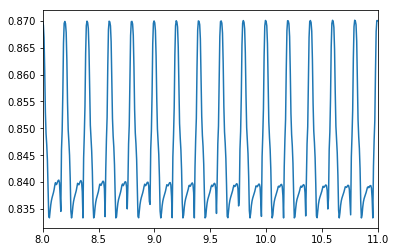

In [188]:
mu = np.linspace(8,11,500)
#inf1 = np.zeros(500)
inf = np.zeros(500)
for i in range(0,500):
    inten = np.sqrt(abs(np.pi/(4*Phi(C[0],C[1],2*np.pi*mu[i]*1e6,5e-6))))/C_1
    #inf1[i] = infidelity(10,Int*10,Int*10,5,6,10,2*np.pi*mu[i]*1e6,1*1e-8,Np)
    inf[i] = fidelity(10,inten,inten,5,6,10,2*np.pi*mu[i]*1e6,5e-6,Np)
#plt.plot(mu,inf1)
plt.plot(mu,inf)
plt.xlim(8,11)



In [168]:
from scipy.optimize import minimize
x0 =  np.asarray((1,1))
bnds = ((0, None), (0, None))
res = minimize(lambda x: 1-fidelity(10,Int*x[0],Int*x[1],4,5,10,2*np.pi*8e6,5e-6,Np),x0,method='SLSQP', bounds=bnds)

# print(res.fun)
# print(res.success)
# print(res.x)
res


     fun: 0.12190248384002345
     jac: array([-0.00022587, -0.00044759])
 message: 'Optimization terminated successfully.'
    nfev: 86
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([4.48484119, 2.02864159])

In [169]:
def calculate(u):
    n = len(u)
    fie = np.zeros(n)
    for i,Mu in enumerate(u):
        res = minimize(lambda x: 1-fidelity(10,Int*x[0],Int*x[1],4,5,10,u[i],5e-6,Np),x0,method='SLSQP', bounds=bnds)
        fie[i] = 1-res.fun
    return fie

## 加上局域势后改变的方案

In [40]:
CC = Coupling(10,Int,Int,5,6,10)
print(CC[1]*1e-6/(2*np.pi),CC[0][0][0]*CC[0][1][0],CC[0][0][1]*CC[0][1][1])
CC[0] # 计算耦合系数g g[0][n] 代表第i个离子和第n+1个模式耦合

[4.85891911 4.84783411 0.90185028 0.99610068 0.99333692 0.98155974
 0.96057285 0.97156753 0.93380121 0.93691379] 3.485682889064217e-05 -3.493662616816984e-05


array([[-5.62857145e-03,  6.19991594e-03,  2.50667206e-05,
        -1.03500092e-05,  2.06474679e-06, -1.73439360e-05,
        -2.26247706e-05, -3.55192925e-06, -2.54903422e-05,
        -5.66407773e-06],
       [-6.19283759e-03, -5.63501610e-03,  2.15166711e-06,
        -3.82286479e-06,  1.26541507e-05, -3.39235598e-06,
        -2.52071681e-06, -2.25428843e-05,  2.67398645e-07,
        -2.98149166e-05]])

### 第一个离子和第二个离子被挑选出两个模式，可认为其他模式均被冻结，仅仅剩下两个离子在振动

#### 对于挑选出的模式第一个离子和第二个离子耦合系数的乘积与光强的关系。

In [51]:
# 求解径向频率分布
def F_rr(n,Int1,Int2,m1,m2,b):  # b为w_r/w_z
    A_r = np.zeros((n,n))  #展开矩阵
    A = np.zeros((2,2))
    g = np.zeros((2,2))
    b1 = C_2*np.sqrt(Int1)
    b2 = C_2*np.sqrt(Int2)
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
                A_r[i][j] = 1/abs(u[i]-u[j])**3
                A_r[i][i] = A_r[i][i] - 1/abs(u[i]-u[j])**3
        A_r[i][i] = A_r[i][i] + b**2
    A_r[m1][m1] = A_r[m1][m1] + b1**2 
    A_r[m2][m2] = A_r[m2][m2] + b2**2 
    A[0][0] = A_r[m1][m1]
    A[1][1] = A_r[m2][m2]
    A[0][1] = A_r[m1][m2]
    A[1][0] = A_r[m2][m1]
    a_r,b_r = np.linalg.eig(A)
    w_r = np.sqrt(a_r)
    for i in range(0,2):
        g[0][i] = C_3 * b_r[0][i] / np.sqrt(w_r[i])
        g[1][i] = C_3 * b_r[1][i] / np.sqrt(w_r[i])
    return w_r/10,g,b_r






In [42]:
Coupling(10,Int*0,Int*0,4,5,10)[1]*1e-6/(2*np.pi)
F_rr(10,Int*0,Int*0,4,5,10)[0]


array([0.903771  , 0.96340961])

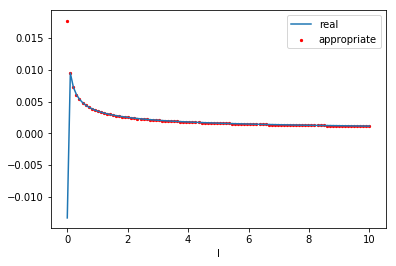

In [228]:
U = np.linspace(0,10,100)
g_0 = np.zeros(100)
g_1 = np.zeros(100)
for i,u in enumerate(U):
    g_0[i] = Coupling(10,Int*u,Int*u,4,5,10)[0][0][0]*Coupling(10,Int*u,Int*u,4,5,10)[0][1][0]
    g_1[i] = F_rr(10,Int*u,Int*u,4,5,10)[1][0][1]*F_rr(10,Int*u,Int*u,4,5,10)[1][1][1]
plt.plot(U,g_0)
plt.scatter(U,g_1,s=5,marker='o',c='red')
plt.xlabel('I')
plt.legend(('real', 'appropriate'),loc='upper right')


#### 对于挑选出的模式本征频率与光强的关系。

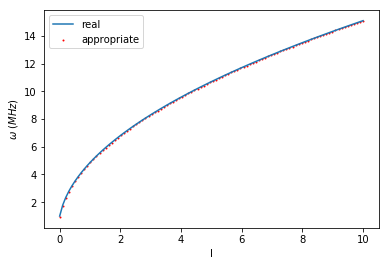

In [226]:
U = np.linspace(0,10,100)
w_0 = np.zeros(100)
w_1 = np.zeros(100)
for i,u in enumerate(U):
    w_0[i] = max(Coupling(10,Int*u,Int*u,4,5,10)[1])*1e-6/(2*np.pi)
    w_1[i] = F_rr(10,Int*u,Int*u,4,5,10)[0][0]
plt.plot(U,w_0)
plt.scatter(U,w_1,s=1,marker='o',c='red')

plt.xlabel('I')
plt.ylabel('$\omega \ (MHz)$')
plt.legend(('real', 'appropriate'),loc='upper left')
plt.show()



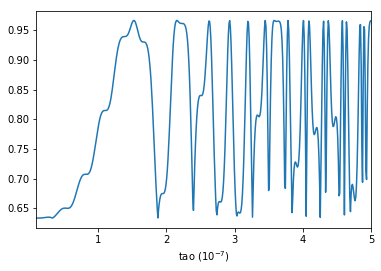

In [189]:
tao = np.linspace(0.1,5,500)
#inf1 = np.zeros(500)
f1 = np.zeros(500)
for i in range(0,500):
    f1[i] = fidelity1(10,Int*10,Int*10,5,6,10,2*np.pi*18*1e6,tao[i]*1e-7,Np)
    #inf2[i] = infidelity2(10,Int/51,Int/51,0,9,10,2*np.pi*mu[i]*1e6,5*1e-6,Np)
#plt.plot(mu,inf1)
plt.xlim(0.1,5)
plt.xlabel('tao $(10^{-7})$')
plt.plot(tao,f1)


In [190]:
u = np.linspace(17,20,500)
#inf1 = np.zeros(500)
f1 = np.zeros(500)
f2 = np.zeros(500)
f3 = np.zeros(500)
for i in range(0,500):
    f1[i] = fidelity1(10,Int*10,Int*10,5,6,10,2*np.pi*u[i]*1e6,1.5*1e-7,Np)
    f2[i] = fidelity1(10,Int*10,Int*10,5,6,10,2*np.pi*u[i]*1e6,3.5*1e-7,Np)
    f3[i] = fidelity1(10,Int*10,Int*10,5,6,10,2*np.pi*u[i]*1e6,4*1e-7,Np)
    #inf2[i] = infidelity2(10,Int/51,Int/51,0,9,10,2*np.pi*mu[i]*1e6,5*1e-6,Np)
#plt.plot(mu,inf1)

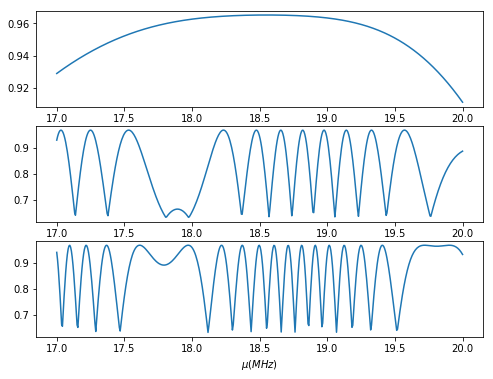

In [191]:
plt.figure(figsize=(8,6))
plt.subplot(311)
plt.plot(u,f1)
plt.subplot(312)
plt.plot(u,f2)
plt.subplot(313)
plt.plot(u,f3)
plt.xlabel('$\mu (MHz) $')
plt.show()

## 计算积累出的几何相位

In [192]:
phi = 0
w_r = CC[1]
tao = 1.5*1e-7
u = 2*np.pi*18*1e6
g = CC[0]
n = 10
for k in range(0,n):
    jf = w_r[k]*(-2*tao*u + np.sin(2*tao*u))/(4*(u**3 - u*w_r[k]**2))  + u*(w_r[k]*np.cos(tao*w_r[k])*np.sin(tao*u)-u*np.cos(tao*u)*np.sin(tao * w_r[k]))/(u**2 - w_r[k]**2)**2
    print(2*g[0][k]*g[1][k]*jf*(C_1*Int*10)**2)
    phi = phi + 2*g[0][k]*g[1][k]*jf*(C_1*Int*10)**2
phi/(np.pi/4)




-0.11164263163607167
0.1108439480059611
1.8074883163393627e-05
-2.4415051637394775e-05
-5.677722252018573e-06
2.3517627701781466e-06
-1.4425064404772932e-05
8.0937378780022e-06
-2.198603898858787e-05
1.4632585656414964e-05


In [193]:
phi = 0
w_r = CC[1]
tao = 3.5*1e-7
u = 2*np.pi*18*1e6
g = CC[0]
n = 10
for k in range(0,n):
    jf = w_r[k]*(-2*tao*u + np.sin(2*tao*u))/(4*(u**3 - u*w_r[k]**2))  + u*(w_r[k]*np.cos(tao*w_r[k])*np.sin(tao*u)-u*np.cos(tao*u)*np.sin(tao * w_r[k]))/(u**2 - w_r[k]**2)**2
    print(2*g[0][k]*g[1][k]*jf*(C_1*Int*10)**2)
    phi = phi + 2*g[0][k]*g[1][k]*jf*(C_1*Int*10)**2
phi/(np.pi/4)

-0.49971127323925196
0.4979838624656073
6.202431511829757e-05
-8.380888864071555e-05
-2.0643631444832378e-05
8.547110974509972e-06
-5.1810894540468636e-05
2.9055791846460345e-05
-7.749367737314129e-05
5.155169375765083e-05


In [194]:
phi = 0
w_r = CC[1]
tao = 4*1e-7
u = 2*np.pi*18*1e6
g = CC[0]
n = 10
for k in range(0,n):
    jf = w_r[k]*(-2*tao*u + np.sin(2*tao*u))/(4*(u**3 - u*w_r[k]**2))  + u*(w_r[k]*np.cos(tao*w_r[k])*np.sin(tao*u)-u*np.cos(tao*u)*np.sin(tao * w_r[k]))/(u**2 - w_r[k]**2)**2
    print(2*g[0][k]*g[1][k]*jf*(C_1*Int*10)**2)
    phi = phi + 2*g[0][k]*g[1][k]*jf*(C_1*Int*10)**2
phi/(np.pi/4)

-0.428968198528591
0.4307674595965323
0.00011541542004927091
-0.00015585760485883839
-3.447279608601588e-05
1.4284690798013321e-05
-8.857867213181465e-05
4.97233286493539e-05
-0.00013728203511835055
9.140256219492935e-05


In [51]:
nf1 = np.zeros((100,100))
U = np.linspace(15,20,100)
Tao = np.linspace(0.1,5,100)
for i,u in enumerate(U):
    for j,tao in enumerate(Tao):
        
        nf1[i][j] = fidelity1(10,Int*10,Int*10,5,6,10,2*np.pi*u*1e6,tao*1e-7,Np)
    #inf2[i] = infidelity2(10,Int/51,Int/51,0,9,10,2*np.pi*mu[i]*1e6,5*1e-6,Np)
#plt.plot(mu,inf1)

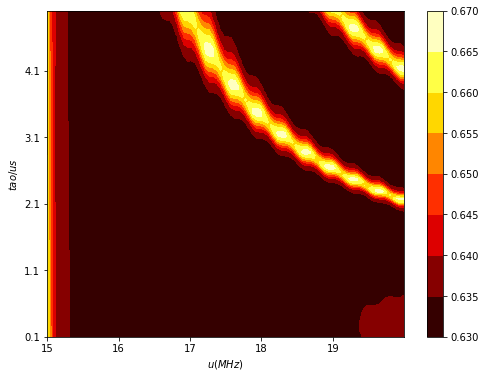

In [52]:
x = np.linspace(15,20,100) 
y = np.linspace(0.1,5,100)
X,Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
plt.xlabel('$u (MHz)$')
plt.ylabel('$tao/us$')
my_x_ticks = np.arange(15,20, 1)
my_y_ticks = np.arange(0.1, 5, 1)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.contourf(X, Y, nf1,origin='lower', cmap=plt.get_cmap('hot'))
plt.colorbar()
max(nf1.flatten())

In [53]:
nf2 = np.zeros((100,100))
U = np.linspace(15,20,100)
I = np.linspace(5,20,100)
for i,u in enumerate(U):
    for j,ii in enumerate(I):
        
        nf2[i][j] = fidelity1(10,Int*10,Int*ii,5,6,10,2*np.pi*u*1e6,4*1e-7,Np)
    

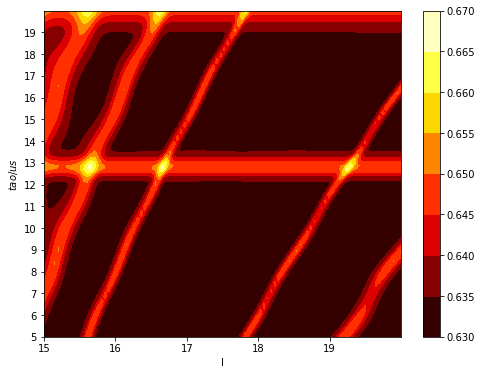

In [54]:
x = np.linspace(15,20,100) 
y = np.linspace(5,20,100)
X,Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
plt.xlabel('I')
plt.ylabel('$tao/us$')
my_x_ticks = np.arange(15,20, 1)
my_y_ticks = np.arange(5, 20, 1)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.contourf(X, Y, nf2,origin='lower', cmap=plt.get_cmap('hot'))
plt.colorbar()
max(nf2.flatten())

In [55]:
CC = Coupling(10,Int*10,Int*10,5,6,5)
print(CC[1]*1e-6/(2*np.pi),CC[0][0][0]*CC[0][1][0],CC[0][0][1]*CC[0][1][1])
CC[0] # 计算耦合系数g g[0][n] 代表第i个离子和第n+1个模式耦合

[15.06508915 15.06151928  0.25173046  0.49216239  0.48654703  0.46203667
  0.41560803  0.44042454  0.34931514  0.35757411] 1.12419846944847e-05 -1.1244649562684807e-05


array([[ 3.19590291e-03, -3.51804083e-03,  4.75135993e-06,
        -1.46932271e-06,  2.97679390e-07, -2.52298851e-06,
         3.43525219e-06,  5.33962680e-07, -4.16536745e-06,
        -9.31148887e-07],
       [ 3.51762397e-03,  3.19628171e-03,  4.16812788e-07,
        -5.47112760e-07,  1.80310249e-06, -4.99831270e-07,
         3.89300249e-07,  3.34289042e-06,  4.19610028e-08,
        -4.82616886e-06]])

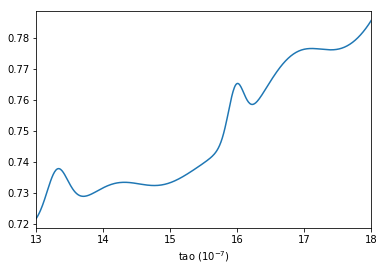

In [56]:
u = np.linspace(13,18,500)
#inf1 = np.zeros(500)
f1 = np.zeros(500)
for i in range(0,500):
    f1[i] = fidelity1(10,Int*10,Int*10,5,5,6,2*np.pi*u[i]*1e6,3.80200400802*1e-7,Np)
    #inf2[i] = infidelity2(10,Int/51,Int/51,0,9,10,2*np.pi*mu[i]*1e6,5*1e-6,Np)
#plt.plot(mu,inf1)
plt.xlim(13,18)
plt.xlabel('tao $(10^{-7})$')
plt.plot(u,f1)


In [57]:
max(f1)

In [58]:
u[np.argmax(f1)]

In [59]:
from scipy.optimize import minimize
x0 =  np.asarray((10.02230837,  10.02292695,   0.9855311 ,   0.98861709))
bnds = ((0, None), (0, None),(0, None), (0, None))
res = minimize(lambda x: 1-fidelity1(10,Int*x[0],Int*x[1],5,6,5,x[2]*2*np.pi*17.3386773547*1e6,3.80200400802*1e-7*x[3],Np),x0,method='SLSQP', bounds=bnds)
res


     fun: 0.36624413798250643
     jac: array([ 1.41710043e-05,  1.46999955e-05, -1.91181898e-04, -5.35473228e-05])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([10.02211073, 10.02272749,  0.9943374 ,  0.99080829])

In [60]:
nf3 = np.zeros((100,100))
I1 = np.linspace(5,20,100)
I2 = np.linspace(5,20,100)
for i,i1 in enumerate(I1):
    for j,i2 in enumerate(I2):
        
        nf3[i][j] = fidelity1(10,Int*i1,Int*i2,5,6,5,2*np.pi*17.3386773547*1e6,3.80200400802*1e-7,np.zeros(10))
    

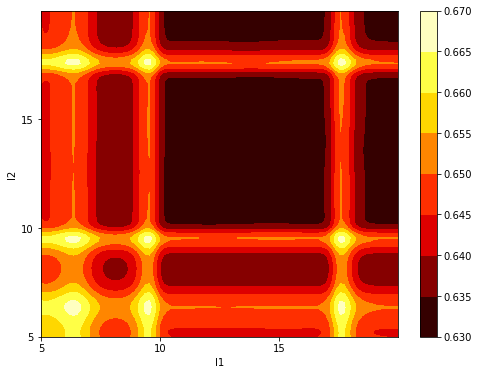

In [61]:
x = np.linspace(5,20,100) 
y = np.linspace(5,20,100)
X,Y = np.meshgrid(x,y)
plt.figure(figsize=(8,6))
plt.xlabel('I1')
plt.ylabel('I2')
my_x_ticks = np.arange(5, 20, 5)
my_y_ticks = np.arange(5, 20, 5)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.contourf(X, Y, nf3,origin='lower', cmap=plt.get_cmap('hot'))
plt.colorbar()
max(nf3.flatten())

# 优化

## 生成波形

array([4.7807815 , 4.76911412, 0.29976804, 0.30135208, 0.49045517,
       0.48911956, 0.45416937, 0.45247261, 0.39517127, 0.39346345])

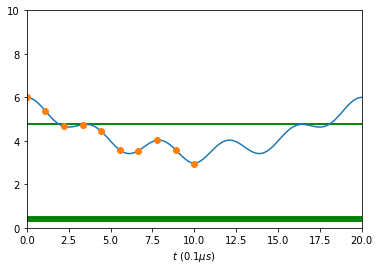

In [30]:

CC = Coupling(10,Int,Int,4,5,5)
w = CC[1]*1e-6/(2*np.pi)
plt.plot(t,p+4)
plt.plot(T,P+4,'o')
plt.hlines(w,0,20,colors='g')
plt.xlim(0,20)
plt.ylim(0,10)
plt.xlabel('$t \ (0.1\mu s)$')
w

In [28]:
def pulse(dot,t,tao):
    f = 0
    tao = tao/2
    l = len(dot)
    if t <= tao:
        for i in range(1,l):
            f = f + dot[i]*np.cos(np.pi*l*t/(2*tao*i))
        f = f + dot[0]*np.cos(l*np.pi*t/(2*tao))
    else:
        for i in range(1,l):
            f = f + dot[i]*np.cos(np.pi*l*(2*tao-t)/(2*tao*i))
        f = f + dot[0]*np.cos(l*np.pi*(2*tao-t)/(2*tao))
    return f
    

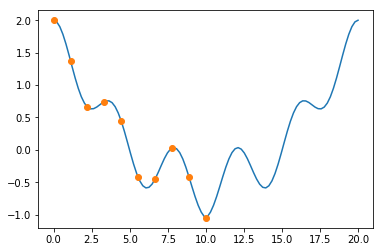

In [29]:
dot = np.ones(10)/5
tao = 20
n = len(dot)
p = np.zeros(100)
P = np.zeros(n)
t = np.linspace(0,tao,100)
T = np.linspace(0,tao/2,n)
for i,tt in enumerate(t):
    p[i] = pulse(dot,tt,tao)
for i,tt in enumerate(T):
    P[i] = pulse(dot,tt,tao)
plt.plot(t,p)
plt.plot(T,P,'o')

In [31]:
from sympy import *
x = symbols('x')
integrate(x, (x, 1, 2))
CC = Coupling(10,Int,Int,4,5,5)
CC[1]*1e-6/(2*np.pi)

array([4.7807815 , 4.76911412, 0.29976804, 0.30135208, 0.49045517,
       0.48911956, 0.45416937, 0.45247261, 0.39517127, 0.39346345])

In [32]:
dot = np.ones(10)
def Displace(g,w_r,tao,dot): # tao为门时间，u为激光之间失谐, 返回失谐模平方
    t = symbols('t')
    n = len(w_r)
    a = np.zeros((2,n))
    for k in range(0,n):
        jf1 = integrate(np.sin(pulse(dot,t,tao))*np.cos(w_r[k]*t), (t, 0, tao))
        jf2 = integrate(np.sin(pulse(dot,t,tao))*np.sin(w_r[k]*t), (t, 0, tao))
        a[0][k] = g[0][k]**2 * (jf1**2 + jf2**2)
        a[1][k] = a[0][k] * (g[1][k]/g[0][k]) **2
    return a


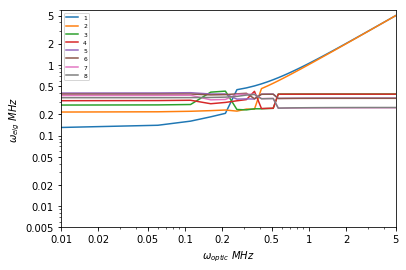

In [34]:
U = np.linspace(0.01,5,100)
w_0 = np.zeros((8,100))

for j in range(8):
    for i,u in enumerate(U):
        w_0[j][i] = Coupling(8,(10*u/C_2)**2,(10*u/C_2)**2,3,4,4)[1][j]*1e-6/(2*np.pi)
for i in range(8):
    plt.loglog(U,w_0[i])
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
Tick_locs = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
plt.xticks(tick_locs, tick_locs)
plt.yticks(Tick_locs, Tick_locs)
plt.xlabel('$\omega_{optic} \ {MHz}$')
plt.ylabel('$\omega_{eig} \ {MHz}$')
plt.xlim(0.01,5)
plt.legend(('1','2','3','4','5','6','7','8'),fontsize=6)


In [35]:
Coupling(8,Int*0,Int*0,3,4,4)[1]*1e-6/(2*np.pi)

array([0.12989643, 0.21532794, 0.27047179, 0.31163257, 0.4       ,
       0.38729833, 0.36855277, 0.34363248])

## 最重要的部分：优化！

### bessal function

In [36]:
from scipy.special import jn
jn(1,1)  #jn(n, x)

### displacement and the accumlated phase

the original Hamilton of the interaction between ions and laser:
\begin{equation}
H=\sum_{j=1}^{N}\hbar\Omega_{j}\cos(\Delta\mathbf{k}\cdot\mathbf{q}_{j}+\mu t)\sigma_{j}^{z},\label{H}
\end{equation}
where $\eta_{k}=\left|\Delta\mathbf{k}\right|\sqrt{\hbar/2M\omega_{k}}$,
and $\Omega_{j}$ denotes the two-photon Rabi frequency of the $j$th
ion, which is proportional to the intensity of the driving laser. $\mathbf{q}_{j}=\sum_{j=1}^{N}\mathbf{b}_{j}^{k}\sqrt{\hbar/2M\omega_{k}}(a_{k}^{\dagger}+a_{k})$
\begin{equation}
H=-\sum_{j=1}^{N}\hbar\Omega_{j}\sin(\Delta\mathbf{k}\cdot\mathbf{q}_{j})\sin (\mu t)\sigma_{j}^{z}
\end{equation}
thus $\Delta\mathbf{k}\cdot\mathbf{q}_{j}=g_{j}^{k}(a_{k}^{\dagger}+a_{k})$,where the coupling constant $g_{j}^{k}=\eta_{k}\mathbf{b}_{j}^{k}$,
\begin{equation}
H=-\frac{1}{2i}\sum_{j=1}^{N}\hbar\Omega_{j}(e^{i g_{j}^{k}(a_{k}^{\dagger}+a_{k})}- e^{-i g_{j}^{k}(a_{k}^{\dagger}+a_{k})})\sin (\mu t)\sigma_{j}^{z}
\end{equation}
so in the interaction picture,theand under the rotation-wave approximation, the interaction-picture
Hamiltonian of the system is
\begin{equation}
H_{I}=-\sum_{j,k=1}^{N}\hbar\chi_{j}(t)g_{j}^{k}(a_{k}^{\dagger}e^{i\omega_{k}t}+a_{k}e^{-i\omega_{k}t})\sigma_{j}^{z},\label{H_int}
\end{equation}
what we do is change the $\sin(\mu t)$in to $\sin(\beta \sin(\mu t))$,so $\chi_{j}(t)=\Omega_{j}\sin(\beta \sin(\mu t))$

#### Numerical integration 

In [68]:
from sympy import *
from scipy.integrate import tplquad,dblquad,quad

x = symbols('x')
t = symbols('t')
b=1
j = integrate(sin(x)*sin(b*sin(x)), (x, 1, 2)).evalf()
print(j)


0.781917175280174


In [69]:
x=sin(50) 
x.evalf()

In [70]:
val2,err2=dblquad(lambda y,x:np.sin(x-y)*np.sin(x)*sin(y),#函数
                  0,#x下界0
                  np.pi,#x上界pi
                  lambda x:0,#y下界x^2
                  lambda x:2*x)#y上界2*x
val2


In [71]:
def int_1(w,b,u,tao):
    jf,err = quad(lambda t:np.sin(w*t)*np.sin(b*np.sin(u*t)),#函数
               0,#x下界0
               tao) 
    return jf
def int_2(w,b,u,tao):
    jf,err = quad(lambda t:np.cos(w*t)*np.sin(b*np.sin(u*t)),#函数
               0,#x下界0
               tao)
    return jf
def int_3(w,b,u,tao):
    jf,err = dblquad(lambda y,x:np.sin(w*(x-y))*np.sin(b*np.sin(u*x))*sin(b*np.sin(u*y)),#函数
                  0,#t2下界0
                  tao,#t2上界tao
                  lambda x:0,#t1下界0
                  lambda x:x)#t1上界x
    return jf


## 这里要说明一下对PHI的积分是二重积分，用dblquad函数慢，而且有些情况下不准，所以去使用nquad函数，可以通过改变options中极限改变积分精度

In [72]:
from scipy import integrate
import math
import numpy as np

options={'limit':300}

def integrand(t1, t2, tao, beta, u,  w):
        return math.sin(w*(t1-t2))*math.sin(beta*math.sin(u*t1))*math.sin(beta*math.sin(u*t2))

def bounds_t1(tao, beta, u, w):
        return [0, tao]
def bounds_t2(t1 ,tao ,beta, u, w):
        return [0, t1]

def int_4(tao, beta, u, w):
    result = integrate.nquad(integrand, [bounds_t2, bounds_t1], args=(tao ,beta, u, w), opts=[options,options])
    return(-result[0])




In [73]:
def COUPLING(n,Int1,Int2,n1,n2,b): #n1,n2 为加上激光的离子，n为离子总数,返回耦合系数，解出的频率本征值，频率本征态
    g = np.zeros((2,n))
    F = Frequence_rr(n,b,n1,n2,C_2*np.sqrt(Int1),C_2*np.sqrt(Int1),C_2*np.sqrt(Int2),C_2*np.sqrt(Int2))
    w_r = np.sqrt(F[2]) 
    b_r = F[3].T
    for i in range(0,n):
        g[0][i] = C_3 * b_r[i][n1] / np.sqrt(w_r[i])
        g[1][i] = C_3 * b_r[i][n2] / np.sqrt(w_r[i])
    return g,w_r*1e5,b_r
CCC=COUPLING(10,Int,Int,4,5,10)  
CCC[1]/10**6

array([4.85858743, 4.84710733, 0.91643924, 0.9169586 , 0.99526191,
       0.99460442, 0.9778905 , 0.97710361, 0.95192454, 0.95121684])

In [74]:
def DISPLACEMENT(g,w_r,beta,u,tao): # tao为门时间，u为激光之间失谐, 返回失谐模平方
    n = len(w_r)
    a = np.zeros((2,n))
    for k in range(0,n):
        jf1 = int_1(w_r[k],beta,u,tao)
        jf2 = int_2(w_r[k],beta,u,tao)
        print(jf1,jf2)
        a[0][k] = g[0][k]**2 * (jf1**2 + jf2**2)
        a[1][k] = g[1][k]**2 * (jf1**2 + jf2**2)
    return a
DISPLACEMENT(CCC[0],CCC[1],0.3,9e6,3e-6)*(C_1*Int)**2
int_1(47e5,0.2,7e6,3e-6)

2.0760969320032152e-09 1.9063680504925613e-08
3.0379777715923943e-09 1.9166534618006123e-08
7.110623210112755e-10 2.3146083358080476e-08
6.934774138285532e-10 2.314456216066311e-08
-1.977618526624414e-09 2.3263698431341214e-08
-1.9552689559388918e-09 2.3259804281529252e-08
-1.3855982681602628e-09 2.3177267167353976e-08
-1.3587209712197033e-09 2.317416256999417e-08
-4.976805397308057e-10 2.311193863343082e-08
-4.734810505681639e-10 2.3111229249328017e-08


In [75]:
def PHI(g,w_r,beta,u,tao):
    n = len(w_r)
    phi = 0
#     w_r = w_r*1e-6
#     u = u*1e-6
#     tao = tao*1e6
    for k in range(0,n):
        jf = int_4(tao, beta, u, w_r[k])
        phi = phi + 2*g[0][k]*g[1][k]*jf
    return phi



### fidelity calculate , 之前文章的结果不考虑加入强聚焦激光引起的效应，通过改变光强改变Rabi频率，自然完全可以满足积累相位角的要求，因为积累的相位角与加上的Rabi频率的平方成正比，所以只去关注displacement。我们这个比较麻烦，在于改变光强会造成一系列影响，没有可以独立出的参量。所以目的应当先满足phi的要求，displacement其实都很小。

In [76]:
def FIDELITY(n,Int1,Int2,n1,n2,b,beta,u,tao,Np): #计算严格求解的非保真度，在考虑局域势的效益下
    C = COUPLING(n,Int1,Int2,n1,n2,b)
    b_r = C[2]
    omega_1 = C_1*Int1
    omega_2 = C_1*Int2
    D = DISPLACEMENT(C[0],C[1],beta,u,tao)[0]*omega_1**2+DISPLACEMENT(C[0],C[1],beta,u,tao)[1]*omega_2**2
    P = PHI(C[0],C[1],beta,u,tao)*omega_1*omega_2
#     INF = 2/3 * (P -np.pi/4)**2
#     for i in range(0,n):
#         INF = INF + 4/3*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i]
    F = 1/3 * abs(np.sin(2*P)) + 1/2
    for i in range(0,n):
        F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])        
    return F,D,P


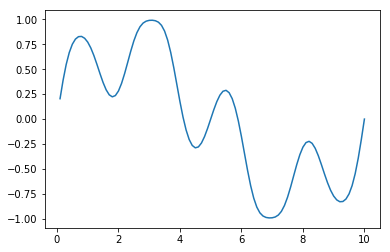

In [77]:
T = np.linspace(0.1,10,100)
f = np.zeros(100)
for i,t in enumerate(T):
    f[i] = np.sin(0.9*np.sin(np.pi*t/5)+0.6*np.sin(4*np.pi*t/5))
plt.plot(T,f)

In [78]:
Np = np.ones(10)
#FIDELITY(10,Int,Int,4,5,10,0.25,2*np.pi*4e6,10e-6,Np)

In [79]:
from scipy.optimize import minimize
x0 =  np.asarray((1,1,0.2))
bnds = ((0, None), (0, None), (0, None))
res = minimize(lambda x: 1-FIDELITY(10,Int*x[0],Int*x[1],4,5,10,x[2],2*np.pi*1e6,10e-6,Np)[0],x0,method='SLSQP', bounds=bnds)

# print(res.fun)
# print(res.success)
# print(res.x)
res

7.832818449354996e-08 8.735102388772331e-08
7.629695329403588e-08 9.55961954694377e-08
-8.335855775011916e-09 6.366500851886901e-08
-8.173453030042798e-09 6.370944947044937e-08
1.63717353079207e-08 6.058583398483747e-08
1.6186202054236812e-08 6.06908076149414e-08
1.1261750795461156e-08 6.293690471579496e-08
1.1021271466808215e-08 6.302206273741257e-08
3.059366716654025e-09 6.472307991862148e-08
2.830682105732954e-09 6.47416629133309e-08
7.832818449354996e-08 8.735102388772331e-08
7.629695329403588e-08 9.55961954694377e-08
-8.335855775011916e-09 6.366500851886901e-08
-8.173453030042798e-09 6.370944947044937e-08
1.63717353079207e-08 6.058583398483747e-08
1.6186202054236812e-08 6.06908076149414e-08
1.1261750795461156e-08 6.293690471579496e-08
1.1021271466808215e-08 6.302206273741257e-08
3.059366716654025e-09 6.472307991862148e-08
2.830682105732954e-09 6.47416629133309e-08
7.832818449354996e-08 8.735102388772331e-08
7.629695329403588e-08 9.55961954694377e-08
-8.335855775011916e-09 6.366500

-8.206856870997887e-09 6.267887928101713e-08
-8.047021566745142e-09 6.272261844092447e-08
1.6118127710700212e-08 5.964744844978527e-08
1.5935486661525704e-08 5.97507854822494e-08
1.1087236428152263e-08 6.196211633290305e-08
1.0850522936160608e-08 6.204594020511123e-08
3.0118393970087023e-09 6.372060796089319e-08
2.7867523318396037e-09 6.373889776708595e-08
6.748599346048678e-08 1.1057325137187997e-07
6.260111784034056e-08 1.1732504759693895e-07
-8.206856870997887e-09 6.267887928101713e-08
-8.047021566745142e-09 6.272261844092447e-08
1.6118127710700212e-08 5.964744844978527e-08
1.5935486661525704e-08 5.97507854822494e-08
1.1087236428152263e-08 6.196211633290305e-08
1.0850522936160608e-08 6.204594020511123e-08
3.0118393970087023e-09 6.372060796089319e-08
2.7867523318396037e-09 6.373889776708595e-08
7.4060127950181e-08 9.954136362168655e-08
7.052458928308399e-08 1.0716568741349982e-07
-8.27136308193557e-09 6.317199545823821e-08
-8.1102439266075e-09 6.321608554976937e-08
1.6244944778574665

     fun: 0.18380720514872162
     jac: array([1246229.80740632,   -6525.14378086, 3187346.96822725])
 message: 'Positive directional derivative for linesearch'
    nfev: 20
     nit: 6
    njev: 2
  status: 8
 success: False
       x: array([0.99902344, 0.99902344, 0.19980469])

In [80]:
x0 =  np.asarray((0.92521377, 0.92534519, 0.29503397, 9))
bnds = ((0, None), (0, None), (0, None), (0, None))
res = minimize(lambda x: 1-FIDELITY(10,Int*x[0],Int*x[1],4,5,10,x[2],2*np.pi*2e6,x[3]*1e-6,Np),x0,method='SLSQP', bounds=bnds)
res


2.592141325526735e-08 3.4526797490110674e-08
2.494521678117534e-08 3.7228892343047484e-08
-2.1585325965246876e-08 3.234868402553078e-08
-2.1543349506030666e-08 3.2449511705883935e-08
-1.0543056394639385e-08 4.430362238641286e-08
-1.0666325112324424e-08 4.42458530515023e-08
-1.3664108057109395e-08 4.23811031245658e-08
-1.3797982321600786e-08 4.228353164640116e-08
-1.7684231351288686e-08 3.8688266319073904e-08
-1.7781064280510157e-08 3.857513255296337e-08
2.592141325526735e-08 3.4526797490110674e-08
2.494521678117534e-08 3.7228892343047484e-08
-2.1585325965246876e-08 3.234868402553078e-08
-2.1543349506030666e-08 3.2449511705883935e-08
-1.0543056394639385e-08 4.430362238641286e-08
-1.0666325112324424e-08 4.42458530515023e-08
-1.3664108057109395e-08 4.23811031245658e-08
-1.3797982321600786e-08 4.228353164640116e-08
-1.7684231351288686e-08 3.8688266319073904e-08
-1.7781064280510157e-08 3.857513255296337e-08


TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

In [904]:
bnds = ((0, None), (0, None), (0, None), (0, None))
def calculate(u):
    n = len(u)
    fie = np.zeros(n)
    for i,Mu in enumerate(u):
        x0 =  np.asarray((1,1,0.2,5))
        res = minimize(lambda x: 1-FIDELITY(10,Int*x[0],Int*x[1],4,5,10,x[2],2*np.pi*1e6*x[3],u[i]*1e-6,Np),x0,method='SLSQP', bounds=bnds)
        print(i,res.fun)
        fie[i] = 1-res.fun
    return fie

In [905]:
u = np.linspace(1,10,100)
zhq = calculate(u)


0 0.10833953039556143
1 0.05980129275745383
2 0.10678147971446594
3 0.03333333717741016
4 0.033362989787921626


/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


5 0.03338840860219028
6 0.03333333449704212
7 0.03333355830232465
8 0.03333333400637328
9 0.033338553706487084
10 0.033333345753942756
11 0.033333333588280833
12 0.033333337842355926
13 0.16471241915551804


/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (300) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


14 0.03333341211579288
15 0.03333301410527045
16 0.03333351221320702
17 0.01668131947415985
18 0.03333478407033974
19 0.03333344021141271
20 0.016702128728782073
21 0.033333386394135744
22 0.03335626220731014
23 0.03333333749874556
24 0.033333340387268096
25 0.033333335683178866
26 0.03333622911401968
27 0.01667187666517711
28 0.034099537407458747
29 0.03333599591509895
30 0.01680247116861444
31 0.03333334882095085
32 0.033343421639919324
33 0.03337069441262308
34 0.0333333333675262
35 0.03355747085447314
36 0.0333333334561271
37 0.01666878503985303
38 0.03356930175896544
39 0.03347682507905425
40 0.033333345491978306
41 0.03338203809305418
42 0.033445310366421066
43 0.033333341367099645
44 0.03348614659943627
45 0.01802277596019697
46 0.016667966673632018
47 0.0333333333561906
48 0.03333377551415806
49 0.03333349350375858
50 0.033446115679984345
51 0.03372259834540292
52 0.03334213551963883
53 0.033333376580460095
54 0.017086051962361237
55 0.019226429687454027
56 0.016786777841265255

KeyboardInterrupt: 

Text(0, 0.5, 'inaccuracy')

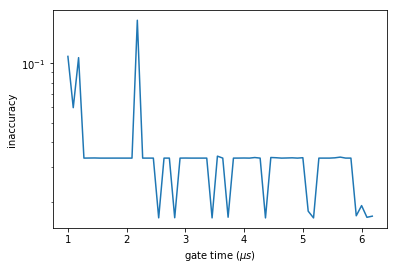

In [912]:
plt.semilogy(u[0:58],ZHQ)
plt.xlabel('gate time ($\mu s)$')
plt.ylabel('inaccuracy')

## 可以看出直接优化貌似并不好所以看看两离子的情况能否给出解析的建议

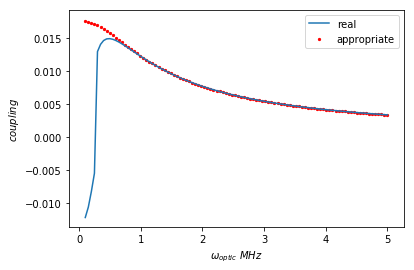

In [52]:
U = np.linspace(0.1,5,100)
g_0 = np.zeros(100)
g_1 = np.zeros(100)
for i,u in enumerate(U):
    g_0[i] = Coupling(10,(10*u/C_2)**2,(10*u/C_2)**2,4,5,10)[0][0][0]*Coupling(10,(10*u/C_2)**2,(10*u/C_2)**2,4,5,10)[0][1][0]
    g_1[i] = F_rr(10,(10*u/C_2)**2,(10*u/C_2)**2,4,5,10)[1][0][1]*F_rr(10,(10*u/C_2)**2,(10*u/C_2)**2,4,5,10)[1][1][1]
plt.plot(U,g_0)
plt.scatter(U,g_1,s=5,marker='o',c='red')
plt.xlabel('$\omega_{optic} \ {MHz}$')
plt.ylabel('$coupling $')
plt.legend(('real', 'appropriate'),loc='upper right')


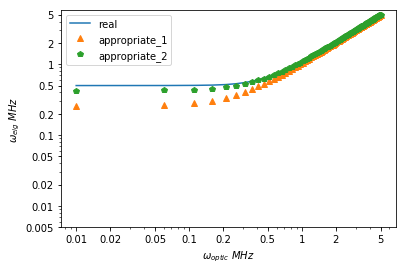

In [53]:
U = np.linspace(0.01,5,100)
w_0 = np.zeros(100)
w_1 = np.zeros(100)
w_2 = np.zeros(100)
for i,u in enumerate(U):
    w_0[i] = max(Coupling(10,(10*u/C_2)**2,(10*u/C_2)**2,4,5,5)[1])*1e-6/(2*np.pi)
    w_1[i] = F_rr(10,(10*u/C_2)**2,(10*u/C_2)**2,4,5,5)[0][0]
    w_2[i] = F_rr(10,(10*u/C_2)**2,(10*u/C_2)**2,4,5,5)[0][1]
plt.loglog(U,w_0)
plt.loglog(U,w_1,'^' )
plt.loglog(U,w_2,'p')
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
Tick_locs = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
plt.xticks(tick_locs, tick_locs)
plt.yticks(Tick_locs, Tick_locs)
plt.xlabel('$\omega_{optic} \ {MHz}$')
plt.ylabel('$\omega_{eig} \ {MHz}$')
plt.legend(('real', 'appropriate_1','appropriate_2'),loc='upper left')


In [54]:
# 求解径向频率分布
def F_rr(n,Int1,Int2,m1,m2,b):  # b为w_r/w_z
    A_r = np.zeros((n,n))  #展开矩阵
    A = np.zeros((2,2))
    g = np.zeros((2,2))
    b1 = C_2*np.sqrt(Int1)
    b2 = C_2*np.sqrt(Int2)
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
                A_r[i][j] = 1/abs(u[i]-u[j])**3
                A_r[i][i] = A_r[i][i] - 1/abs(u[i]-u[j])**3
        A_r[i][i] = A_r[i][i] + b**2
    A_r[m1][m1] = A_r[m1][m1] + b1**2 
    A_r[m2][m2] = A_r[m2][m2] + b2**2 
    A[0][0] = A_r[m1][m1]
    A[1][1] = A_r[m2][m2]
    A[0][1] = A_r[m1][m2]
    A[1][0] = A_r[m2][m1]
    a_r,b_r = np.linalg.eig(A)
    w_r = np.sqrt(a_r)
    for i in range(0,2):
        g[0][i] = C_3 * b_r[0][i] / np.sqrt(w_r[i])
        g[1][i] = C_3 * b_r[1][i] / np.sqrt(w_r[i])
    return w_r/10,g,b_r,A


In [55]:
C_2*np.sqrt(Int)

In [509]:
F_rr(10,Int,Int,4,5,10)[0]

array([4.61312356, 4.85297809])

In [137]:
a_0 = -(F_rr(10,Int,Int,4,5,10)[3][0][0]-100-(C_2*np.sqrt(Int))**2) ##来源于相互作用对角项
a_1 = F_rr(10,Int,Int,4,5,10)[3][0][1]  ##来源于相互作用非对角项
print(a_0,a_1)

12.751995465859181 5.567803136453221


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


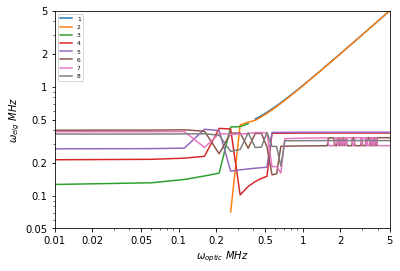

In [496]:
U = np.linspace(0.01,5,100)
w_0 = np.zeros((8,100))

for j in range(8):
    for i,u in enumerate(U):
        w_0[j][i] = Coupling(10,(10*u/C_2)**2,(10*u/C_2)**2,2,6,4)[1][j]*1e-6/(2*np.pi)
for i in range(8):
    plt.loglog(U,w_0[i])
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
Tick_locs = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
plt.xticks(tick_locs, tick_locs)
plt.yticks(Tick_locs, Tick_locs)
plt.xlabel('$\omega_{optic} \ {MHz}$')
plt.ylabel('$\omega_{eig} \ {MHz}$')
plt.xlim(0.01,5)
plt.ylim(0.05,5)
plt.legend(('1','2','3','4','5','6','7','8'),fontsize=6)


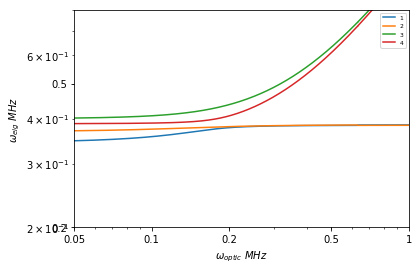

In [498]:
U = np.linspace(0.05,1,500)
w_0 = np.zeros((4,500))

for j in range(4):
    for i,u in enumerate(U[0:13]):
        w_0[j][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][j]*1e-6/(2*np.pi)
for i,u in enumerate(U[13:18]):
    i = i +13
    w_0[0][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][0]*1e-6/(2*np.pi)
    w_0[1][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][2]*1e-6/(2*np.pi)
    w_0[2][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][1]*1e-6/(2*np.pi)
    w_0[3][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][3]*1e-6/(2*np.pi)

for i,u in enumerate(U[18:289]):
    i = i +18
    w_0[0][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][2]*1e-6/(2*np.pi)
    w_0[1][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][3]*1e-6/(2*np.pi)
    w_0[2][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][0]*1e-6/(2*np.pi)
    w_0[3][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][1]*1e-6/(2*np.pi)

for i,u in enumerate(U[289:306]):
    i = i +289
    w_0[0][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][2]*1e-6/(2*np.pi)
    w_0[1][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][3]*1e-6/(2*np.pi)
    w_0[2][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][0]*1e-6/(2*np.pi)
    w_0[3][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][1]*1e-6/(2*np.pi)

w_0[0][306] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][3]*1e-6/(2*np.pi)
w_0[1][306] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][2]*1e-6/(2*np.pi)
w_0[2][306] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][0]*1e-6/(2*np.pi)
w_0[3][306] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][1]*1e-6/(2*np.pi)


for i,u in enumerate(U[307:500]):
    i = i + 307
    w_0[0][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][1]*1e-6/(2*np.pi)
    w_0[1][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][0]*1e-6/(2*np.pi)
    w_0[2][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][2]*1e-6/(2*np.pi)
    w_0[3][i] = Coupling(4,(10*u/C_2)**2,(10*u/C_2)**2,1,2,4)[1][3]*1e-6/(2*np.pi)

for i in range(4):
    plt.loglog(U,w_0[i])

tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
Tick_locs = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
plt.xticks(tick_locs, tick_locs)
plt.yticks(Tick_locs, Tick_locs)
plt.xlabel('$\omega_{optic} \ {MHz}$')
plt.ylabel('$\omega_{eig} \ {MHz}$')
plt.xlim(0.05,1)
plt.ylim(0.2,0.8)
plt.legend(('1','2','3','4'),fontsize=6)


### to two ions, the optic frequence we add is much larger than the interaction between ions, so the eigvalue of the two states are $\sqrt{b^{2}+\omega_{optic}^{2}-a_{0}+a_{1}}$and$\sqrt{b^{2}+\omega_{optic}^{2}-a_{0}-a{1}}$,eigstate is (1,1) and (1,-1)
$\phi_{jn}(\tau)=2\int_{0}^{\tau}dt_{2}\int_{0}^{t_{2}}dt_{1}\chi_{2}(t_{2})g_{2}^{k}g_{1}^{k}\chi_{1}(t_{1})\sin\omega_{k}(t_{2}-t_{1})=2\int_{0}^{\tau}dt_{2}\int_{0}^{t_{2}}dt_{1}\chi_{2}(t_{2})\chi_{1}(t_{1})(\eta_{1}^{2}\sin\omega_{1}(t_{2}-t_{1})-\eta_{2}^{2}\sin\omega_{2}(t_{2}-t_{1}))$

In [58]:
## omega
C_1*Int/1e9

In [59]:
## optic frequence
C_2 * np.sqrt(Int) ## 100KHz

In [60]:
## lamb-Dicke 
C_3/np.sqrt(C_2 * np.sqrt(Int))

In [500]:
w_1 = (25-a_0+a_1)/100 * 1e12
w_2 = (25-a_0-a_1)/100 * 1e12
print(np.sqrt(w_1+1e12),np.sqrt(w_2+1e12),a_0,a_1)

1085429.9040960409 1032861.0816449984 12.751995465859181 5.567803136453221


In [287]:
options={'limit':500}

def integrand(t1, t2, tao, beta, u,  w, w1, w2):
        return (math.sin(math.sqrt(w**2+w1)*(t1-t2))/math.sqrt(w**2+w1)-math.sin(math.sqrt(w**2+w2)*(t1-t2))/math.sqrt(w**2+w2))*math.sin(beta*math.sin(u*t1))*math.sin(beta*math.sin(u*t2))

def bounds_t1(tao, beta, u, w, w1, w2):
        return [0, tao]
def bounds_t2(t1 ,tao ,beta, u, w, w1, w2):
        return [0, t1]

def int_5(tao, beta, u, w, w1, w2):  ## tao us, u MHz, w MHz
    result = integrate.nquad(integrand, [bounds_t2, bounds_t1], args=(tao ,beta, u, w, w1, w2), opts=[options,options])
    return(-result[0]*C_4*w**4)



In [78]:
int_5(5e-6, 0.2, 5.1e6, 4.7e6, w_1, w_2)

In [79]:
C_4 = (C_3)**2*100*10**3*((1e-5/C_2)**2*C_1)**2

In [114]:
u=np.linspace(1,8,100)
pppppp = np.zeros(100)
for i,uu in enumerate(u):
    pppppp[i] = int_5(5e-6, 0.3, uu*1e6, 3e6, w_1, w_2)

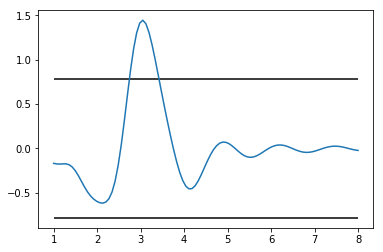

In [115]:
plt.plot(u,pppppp*2*np.pi)
plt.hlines(np.pi/4,1,8)
plt.hlines(-np.pi/4,1,8)

In [280]:
def two_ion_fieldity(b, tao, beta, u, w): ## w为附加上的局域势，b为径向和轴向频率之比，tao为时间，两束光之间失谐为beta*sin(u*t)  **)
    w1 = (b**2-a_0+a_1)/100 * 1e12
    w2 = (b**2-a_0-a_1)/100 * 1e12
    W1 = math.sqrt(w**2+w1)
    W2 = math.sqrt(w**2+w2)
    g1 = C_3/math.sqrt(2*W1/(10**5))
    g2 = C_3/math.sqrt(2*W2/(10**5))
    d = (int_1(W1,beta,u,tao)**2+int_2(W1,beta,u,tao)**2)*g1**2+(int_1(W2,beta,u,tao)**2+int_2(W2,beta,u,tao)**2)*g2**2
    d = d * ((w*1e-5/C_2)**2*C_1)**2
    P = int_5(tao, beta, u, w, w1, w2)*2*np.pi
    F = 1/3 * abs(np.sin(2*P)) + 1/2      
    F = F + 1/6 * np.exp(-16*(1/2+1)*d)        
    return F,d,P

6.561510954790669e-17


In [183]:
w=1e6
b=0.2
u=1e6*2+2*np.pi/tao
tao=2*np.pi*10/w
int_1(w,b,u,tao)

In [108]:
(47/C_2)**2*C_1/1e8

In [101]:
int_2(w,b,u,tao)

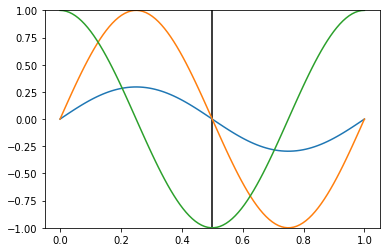

In [126]:
T = np.linspace(0,1,100)
u1 = np.zeros(100)
u2 = np.zeros(100)
u3 = np.zeros(100)
for i,t in enumerate(T):
    u1[i] = np.sin(0.3*np.sin(2*np.pi*t))
    u2[i] = np.sin(2*np.pi*t)
    u3[i] = np.cos(2*np.pi*t)
plt.plot(T,u1,T,u2,T,u3)
plt.vlines(0.5,-1,1)
plt.ylim(-1,1)

In [314]:
x0 =  np.asarray((6.2,3.5,0.2))
bnds = ((1, None), (0, None), (0.1, None))
res = minimize(lambda x: 1-two_ion_fieldity(5,x[0]*1e-6, x[2], (x[1]+2*np.pi/x[0])*1e6, x[1]*1e6)[0],x0,method='COBYLA')
print(res)
print(two_ion_fieldity(5, res.x[0]*1e-6, res.x[2], (res.x[1]+2*np.pi/res.x[0])*1e6, res.x[1]*1e6)[1])
print(two_ion_fieldity(5, res.x[0]*1e-6, res.x[2], (res.x[1]+2*np.pi/res.x[0])*1e6, res.x[1]*1e6)[2])

     fun: 0.016435790052323873
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 156
  status: 1
 success: True
       x: array([7.16135193, 3.44391162, 0.19997673])
0.004287354096491706
-0.7709486961933789


In [321]:
x0 =  np.asarray((5.07743581,6,0.2))
bnds = ((1, None), (0, None), (0.1, None))
res = minimize(lambda x: 1-two_ion_fieldity(5,x[0]*1e-6, x[2], (x[1]+2*np.pi/x[0])*1e6, x[1]*1e6)[0],x0,method='COBYLA')
print(res)
print(two_ion_fieldity(5, res.x[0]*1e-6, res.x[2], (res.x[1]+2*np.pi/res.x[0])*1e6, res.x[1]*1e6)[1])
print(two_ion_fieldity(5, res.x[0]*1e-6, res.x[2], (res.x[1]+2*np.pi/res.x[0])*1e6, res.x[1]*1e6)[2])

     fun: 0.0049126071569806085
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 52
  status: 1
 success: True
       x: array([5.25892567, 5.91807477, 0.18741569])
0.0012421371683649183
-0.7802911712844134


In [346]:
x = np.linspace(4,10,50)
y = np.linspace(4,10,50)
xx = np.zeros(2500)
xxx = np.zeros((2500,3))
k = 0
for i,X in enumerate(x):
    for j,Y in enumerate(y):
        x0 =  np.asarray((X,Y,0.2))
        res = minimize(lambda x: 1-two_ion_fieldity(5,x[0]*1e-6, x[2], (x[1]+2*np.pi/x[0])*1e6, x[1]*1e6)[0],x0,method='COBYLA')
        if res.success == True and res.x[2]>0:
            print(res.success)
            xx[k] = res.fun
            print(xx[k])
            xxx[k] = res.x
            print(xxx[k])
            k=k+1
            
            

True
0.005358639463753145
[4.93927411 5.03281907 0.24228602]
True
0.006505178264934353
[4.99679156 4.343497   0.27547859]
True
0.005001355991345213
[5.06662967 5.52526205 0.21238351]
True
0.004795144194045586
[4.99120747 5.61005945 0.21389834]
True
0.004607119827069961
[4.9200166  5.69236384 0.21551146]
True
0.005507171081295392
[4.98776538 4.98295343 0.24111208]
True
0.004271345620336264
[5.00624712 6.22150723 0.19222068]
True
0.00426973157582089
[5.00548869 6.22232929 0.19229779]
True
0.004198461216617377
[4.97538557 6.26049086 0.19274365]
True
0.00496263229450411
[5.05259694 5.54083276 0.21275671]
True
0.00484427202241311
[5.00945519 5.58922522 0.21365478]
True
0.004600483243788589
[4.91755731 5.6954098  0.21554246]
True
0.02193906583716343
[5.04853438 6.79356779 0.17367541]
True
0.003723515178732262
[4.95828272 6.91754854 0.17531179]
True
0.004086673064809476
[4.92737435 6.32239851 0.19371151]
True
0.004273698325959918
[5.00702725 6.22013729 0.19222449]
True
0.0038772158629447606
[

True
0.04290218417927916
[5.43991743 9.71440048 0.09215389]
True
0.00820677138098369
[5.41717655 3.99904659 0.26436949]
True
0.005597548434214228
[5.35990496 5.21746494 0.20762467]
True
0.005796956835363631
[5.34972533 5.22762482 0.20653215]
True
0.005442752888089042
[5.29837843 5.27801788 0.20887428]
True
0.006667490246261787
[5.33282432 4.65434826 0.23297807]
True
0.005244476010028198
[5.37874862 5.78439638 0.18523923]
True
0.0052048781591257365
[5.36487288 5.7994286  0.18551644]
True
0.004458696464243905
[4.34476491 5.00970896 0.2957938 ]
True
0.005606461323494849
[5.36244109 5.2148237  0.20595308]
True
0.004770030355514487
[5.40951802 6.33220752 0.16780938]
True
0.005012437036629125
[5.0703582  5.52096364 0.21216725]
True
0.017839111061516144
[5.67095765 5.48145904 0.31584549]
True
0.0052850420662720055
[5.39289168 5.76853121 0.18515302]
True
0.005206290998902352
[5.36535081 5.79880889 0.18551644]
True
0.004970451473310211
[5.28031815 5.89372947 0.18713856]
True
0.00465791614769117

True
0.006045190243622933
[5.41794947 5.1616341  0.20602864]
True
0.005095166489744729
[4.85020969 5.12679337 0.24444827]
True
0.006502749025934396
[5.78251603 5.37403276 0.17868699]
True
0.005800860445530853
[5.56623964 5.58614085 0.18214302]
True
0.005989368185788435
[5.83868794 5.8600463  0.16145146]
True
0.003751926668315253
[4.77637699 6.52536408 0.19682745]
True
0.004318244831572837
[4.80568682 5.83005377 0.2180423 ]
True
0.004085428266523583
[4.70891897 5.95192592 0.22044501]
True
0.004131966272750365
[4.72862496 5.92666448 0.21987308]
True
0.17046313873781294
[4.77572979 7.17796167 0.31341075]
True
0.003579685280947653
[4.67370523 7.33400258 0.18118165]
True
0.003834342201363028
[4.81442243 6.4728383  0.19616109]
True
0.0036736738517358924
[4.73941309 6.57693218 0.19763268]
True
0.0035507012569896412
[4.67972267 6.6615585  0.1988819 ]
True
0.0030255533850302996
[4.76811437 7.85563197 0.16405159]
True
0.0028982620835193984
[4.69269295 7.98321495 0.16550137]
True
0.00358236168153

True
0.004964494305422118
[5.05326026 5.54001419 0.21256883]
True
0.003986032029521525
[5.06116384 6.77189215 0.17326062]
True
0.005259939515186884
[5.38425892 5.77820591 0.1853081 ]
True
0.004544855832687822
[5.11752733 6.08394869 0.19018167]
True
0.020968811753186878
[5.05039937 6.16634195 0.43701667]
True
0.004357913660317347
[5.04218753 6.176523   0.19150778]
True
0.022396363751004955
[5.21402186 6.57765406 0.17079929]
True
0.02241611174795488
[5.14757336 6.65834109 0.17227056]
True
0.003294631034071571
[5.0891498  6.73698332 0.15675879]
True
0.098042919341504
[5.03668351 6.80923289 1.24210398]
True
0.014186826936450125
[6.09860067 8.18127688 0.19561312]
True
0.0034807454735330534
[5.01776281 7.46044671 0.15990464]
True
0.10411524977140785
[5.12402533 7.30551017 1.207137  ]
True
0.014040706291288063
[6.09906147 7.66958488 0.20172028]
True
0.03390030301429858
[6.30190704 7.9139384  0.2961778 ]
True
0.016183838012960527
[6.21465197 8.0850012  0.1049708 ]
True
0.005189300019563747
[6.

True
0.006556391941323625
[6.55338786 6.64817411 0.1198905 ]
True
0.006271817579891481
[6.51434118 6.69107587 0.11907206]
True
0.12941168808161896
[6.50002696 6.82842995 0.11619762]
True
0.00547298636304705
[6.20427226 7.03109624 0.12312249]
True
0.016903896896460213
[6.48430778 7.20814743 0.19550793]
True
0.005392987679579964
[6.33171622 7.38455464 0.11357377]
True
0.006480203967015874
[6.71041214 6.96283788 0.11018713]
True
0.02231959278332707
[6.46797667 8.68523738 0.21103794]
True
0.1666704220122922
[6.46565397 8.29647969 1.20683871]
True
0.14833477910076653
[5.50299522 9.08849871 0.11422374]
True
0.02075297523530839
[6.46953351 9.1686836  0.1980704 ]
True
0.0030884801526129824
[5.38291319 9.28211779 0.11574146]
True
0.0020272673945984643
[ 4.37751494 10.00061159  0.14692492]
True
0.003392357952187286
[5.43536249 8.61560752 0.12274713]
True
0.034922538112174606
[5.47373793 9.65470736 0.20466743]
True
0.02021498710899383
[6.12693417 8.66093364 0.2298465 ]
True
0.1496206476172931
[5.

True
0.008107620995994269
[5.96811174 4.67664369 0.19528481]
True
0.00857289237198633
[6.3263295  4.90435966 0.17051337]
True
0.008222712612784067
[6.24205803 4.97165624 0.17169542]
True
0.007908565401912426
[6.16431147 5.03566431 0.17291112]
True
0.006964286749335247
[5.41283619 4.58413221 0.23113169]
True
0.0069983708992461535
[6.14270405 5.56567004 0.15731772]
True
0.16672635954297133
[6.95744634 5.95823422 1.19873945]
True
0.12543467634997985
[7.02596284 7.11737482 0.1005787 ]
True
0.007873278601160938
[6.96085802 6.25717904 0.11605353]
True
0.0221349998701581
[6.91106629 6.30308546 0.2030283 ]
True
0.11783821227230806
[6.78639054 6.5399002  0.11230151]
True
0.16574400178442072
[7.042081   6.61096867 0.10891923]
True
0.16667540372427503
[6.53764227 6.74805273 1.23801201]
True
0.08966620478500853
[6.48084775 8.14344    0.09990936]
True
0.005051293248851452
[6.00671887 8.32607534 0.10915371]
True
0.07248189673583294
[7.32591717 8.08506556 0.27961129]
True
0.018741596663648386
[5.7325

True
0.00463934309398395
[6.03132372 7.7566878  0.11636118]
True
0.08408402792458636
[6.29939657 7.03904463 0.09652089]
True
0.005029887103259134
[5.87377515 6.89521209 0.13614868]
True
0.1666693537031887
[7.32653787 7.18382425 1.20003393]
True
0.00516851105324434
[6.24625674 7.48656839 0.11452856]
True
0.005454298066552177
[6.35438125 7.35743429 0.11331995]
True
0.16728958420893802
[6.57769622 6.55048914 0.12084882]
True
0.032608980549055144
[7.32773205 7.66056225 0.19772512]
True
0.006015966553472807
[6.63214931 7.51341349 0.10449764]
True
0.005778382290093309
[6.83360101 9.15769057 0.0757919 ]
True
0.16668608587005673
[6.76521067 8.12065369 1.43289539]
True
0.038296386374144675
[7.3645254  9.31961676 0.19546376]
True
0.11394917106520364
[ 6.25800449 10.46990817  0.14423995]
True
0.03128837046465249
[7.37482738 9.73717594 0.17158403]
True
0.05124045573595404
[7.32968081 8.91395727 0.20065379]
True
0.2563888972588968
[7.28400353 8.99446884 0.17338668]
True
0.061525273357273536
[7.0210

True
0.01301926370108919
[6.94819604 4.00504698 0.1806096 ]
True
0.012520087905085076
[7.13552017 4.3391193  0.16006379]
True
0.01186765060995798
[7.01560578 4.41444237 0.161591  ]
True
0.055906800674071166
[7.01284312 4.55974092 0.14225003]
True
0.006216988480919339
[6.49731711 6.71007349 0.11900676]
True
0.011782576663931787
[7.69418627 5.24621344 0.11854138]
True
0.011820000720942136
[7.70139361 5.23980229 0.11833425]
True
0.0422504143146083
[7.55375119 5.43235462 0.11440554]
True
0.1084274190776402
[7.81575    6.7064486  0.20793144]
True
0.026693098201906018
[8.00067164 7.00482808 0.14647809]
True
0.022430101142144165
[6.76107132 5.97957964 0.22104816]
True
0.16668055186927777
[5.82652979 7.11723324 1.33266519]
True
0.02125407518241318
[6.78339271 6.42875345 0.20446468]
True
0.16590144206008672
[6.90198304 6.74545825 0.10952364]
True
0.038755154928584945
[6.63650784 6.18447887 0.12105425]
True
0.026078265456720207
[6.82498544 6.82171762 0.19196386]
True
0.0215693937289948
[7.762677

True
0.0059066887535380586
[7.17090591 9.58989983 0.07462535]
True
0.0032080329098430616
[ 7.7040244  10.95797927  0.04376316]
True
0.036385739328458344
[ 7.17581761 10.00689064  0.1976274 ]
True
0.015239749481474218
[6.64030929 3.24590422 0.23792879]
True
0.16261486030233196
[8.30530725 4.12248647 0.21043246]
True
0.16667619510552434
[7.75542722 4.24152005 1.13691103]
True
0.01553257421068932
[8.16428051 4.55498221 0.12407131]
True
0.04131861723407326
[8.30512313 4.8561703  0.19884186]
True
0.05584439281643094
[8.53784936 6.1025012  0.08698487]
True
0.0522634390610639
[7.99946427 5.12878815 0.11226111]
True
0.012375913924733695
[7.81454555 5.1645703  0.11746839]
True
0.04986939296795356
[8.32116029 6.34799423 0.19455062]
True
0.009918653940946265
[7.28979137 5.54074921 0.12182088]
True
0.028151319942637976
[7.2881524  5.54226377 0.21262311]
True
0.009191745964406306
[7.30468678 5.95855112 0.11323334]
True
0.026210401614373602
[7.30585634 5.95823418 0.19717879]
True
0.00983808980699096

True
0.029767422862763793
[7.39693602 8.43412189 0.1766161 ]
True
0.16678335823641288
[7.5956927  7.92655888 1.21625473]
True
0.038230003533856194
[8.88446848 7.8244147  0.06168718]
True
0.0329375183146251
[7.6771138  8.53230269 0.16874265]
True
0.0363781611700682
[8.64469947 8.96770224 0.08298812]
True
0.015265945201481612
[8.68594523 8.99024386 0.07746284]
True
0.04078419016607038
[ 8.69033975 10.04519782  0.12024187]
True
0.15191212619923666
[7.76692217 9.2541758  0.14120757]
True
0.3313565132203453
[9.13029247 9.51483133 2.27989826]
True
0.04428774732884899
[6.97379587 9.08850467 0.07741879]
True
0.01988564148716887
[ 8.66232484 10.81923803  0.0838312 ]
True
0.04413273066765022
[ 7.42589966 10.94683901  0.19273246]
True
0.16666837320528072
[8.25991121 3.91215454 1.56542467]
True
0.16674544815302417
[8.71915167 4.15245544 1.28624637]
True
0.05248569928395408
[8.80184734 4.2208529  0.20884252]
True
0.01790207638326069
[8.80006796 4.57828861 0.11009257]
True
0.018255739455621978
[8.85

True
0.03529192066437581
[8.06325411 5.39229025 0.18787862]
True
0.07361796974244084
[9.15655683 6.46137134 0.19609372]
True
0.16675726230970567
[9.15968912 5.5824871  1.20492992]
True
0.053530306685880324
[8.59335082 7.11656946 0.07275816]
True
0.1669752114662737
[9.09025496 6.12486572 1.14785356]
True
0.1666793917496392
[7.89807829 6.61130348 1.33132275]
True
0.010870093647410317
[8.55059772 8.04014818 0.06749048]
True
0.09027993474798834
[8.20730959 6.42843625 0.08822543]
True
0.011820964578086679
[8.6523561  7.58407911 0.06933646]
True
0.019531234678378917
[7.9632773  7.77259027 0.07518635]
True
0.011126875039593087
[8.61109091 7.98358913 0.06721593]
True
0.16667154708170084
[7.85466934 8.80174389 1.78334573]
True
0.13500829937845338
[9.14931492 7.16842329 0.20444224]
True
0.04769899105877806
[8.06702232 6.83843567 0.08336748]
True
0.012450657336658733
[8.97757876 7.27199167 0.06774048]
True
0.12531456143886
[9.15902364 7.54022992 0.19798717]
True
0.030549633660982622
[8.10416845 8

True
0.1671875147529165
[8.5840605  8.80752452 0.92818261]
True
0.026219489622601455
[9.45001912 9.9224245  0.07981494]
True
0.1662148076622746
[8.52009696 9.82692905 0.35457261]
True
0.11420399905195722
[8.03560914 8.92851383 0.33816033]
True
0.11637010753899646
[8.36846668 9.00885827 0.19574282]
True
0.21702365400615453
[ 9.61550514 10.12542048  1.20540585]
True
0.19059312930057026
[8.96171599 9.33586752 1.49220256]
True
0.19283614550238504
[ 8.53067624 10.87818445  1.20187545]
True
0.07988325363927473
[ 8.53895921 10.99234434  0.18786132]
True
0.02716022832649656
[10.14852626  3.96299149  0.1017998 ]
True
0.01850804491861502
[9.58622871 5.18189791 0.08564214]
True
0.05476418880203715
[8.3322148  3.83435484 0.13485362]
True
0.018553205759476277
[8.90437956 4.52396488 0.10950142]
True
0.018187393820856657
[8.84624905 4.5543016  0.10977258]
True
0.042263116016746594
[8.64114958 5.76225369 0.15555129]
True
0.020440394897903946
[9.68084319 4.80462741 0.09074913]
True
0.11674713458397401


True
0.16677747441312862
[10.43985086  6.14095502  1.49216411]
True
0.16735714937430257
[9.42581617 6.50267257 1.49543004]
True
0.087688103408605
[10.04371785  6.19846817  0.17854183]
True
0.11483716742655226
[10.01543829  6.51966096  0.21811698]
True
0.02814161456187869
[9.01739259 6.62326057 0.07173619]
True
0.010534281049901617
[9.52000825 7.85534535 0.05403362]
True
0.07262347524415991
[9.21066767 6.75741924 0.18747197]
True
0.09332519829134589
[9.00394291 6.95713642 0.18691841]
True
0.010026916056715685
[11.04596707  7.63653793  0.03556058]
True
0.11752999531209107
[10.01673579  7.17709005  0.19981712]
True
0.05270374153660584
[8.86841309 8.4334825  0.05606234]
True
0.08425674775137526
[9.04070156 7.56934638 0.19887858]
True
0.01101253365233823
[8.93387153 7.67452195 0.06597855]
True
0.019552786537404554
[8.94064094 7.96316004 0.05786924]
True
0.07384550854722804
[9.00234711 9.02678768 0.17155534]
True
0.17557132709326673
[10.01743615  8.15509562  0.20002122]
True
0.11860951982428

True
0.26475227815832114
[9.3871099  9.0224671  1.20852062]
True
0.021393282235413258
[ 9.27002619 10.41336459  0.06198707]
True
0.005241609351120946
[8.94787542 9.43072116 0.04026017]
True
0.009079429439400655
[ 9.2790352  10.11228532  0.04600333]
True
0.0424456175101966
[9.42367344 3.99481478 0.11131035]
True
0.04215490482273243
[9.37519883 4.01561084 0.11060357]
True
0.024424312693180572
[9.47685692 5.27828812 0.08390799]
True
0.11199522717739185
[10.46544441  4.73695843  0.21997795]
True
0.019251911694971424
[9.51670423 5.85614275 0.07528945]
True
0.05060529995867158
[9.09478909 4.6927106  0.10194258]
True
0.02989125606798848
[9.45110039 5.21073062 0.08805095]
True
0.16672660272459183
[10.77968173  4.31712686  1.40215117]
True
0.030809439176485154
[9.73903678 5.47809821 0.07615515]
True
0.16670553363615415
[10.51025292  5.71420165  1.20002341]
True
0.05639548900059732
[9.97772016 7.00926232 0.05914705]
True
0.045245424925072775
[9.68083919 6.19856907 0.06862576]
True
0.172957238350

True
0.18750242696295283
[10.4593087  7.4784701  1.4045345]
True
0.012299478212158377
[9.89288705 7.24181232 0.05519439]
True
0.1723538891397366
[9.96787277 9.08461781 0.68751317]
True
0.08160266751820366
[10.87584675  8.14352926  0.06742615]
True
0.0444402104776116
[8.87797594 8.09483932 0.05848417]
True
0.1678006671944715
[9.90791055 9.40220261 1.19142056]
True
0.03151793647921797
[10.37628024  9.50270992  0.03577653]
True
0.17522311817278435
[ 8.91063485 10.31869984  1.69205026]
True
0.015031815378776625
[10.09713813 10.15614959  0.03615635]
True
0.4049479885089612
[11.21244879  9.22135729  1.51470969]
True
0.19415747438313846
[10.88892455 10.1493606   1.1915766 ]
True
0.03901412501466628
[10.38643779 10.31248376  0.04362284]
True
0.17673856147085165
[10.62095769  8.55805049  1.43542303]
True
0.19561028951227422
[10.82640213  9.63469119  1.24431648]
True
0.015540987626141423
[10.60142114  9.41542964  0.04557343]
True
0.14698503406193408
[10.87755487  9.75536198  0.2000267 ]
True
0.1

In [381]:
xx = xx[0:1944]
xxx = xxx[0:1944]
min(xx)

In [380]:
x0 =  np.asarray((5,xxx[15][0],xxx[15][1],xxx[15][2],xxx[15][1]+2*np.pi/xxx[15][0]))
res = minimize(lambda x: 1-two_ion_fieldity(x[0],x[1]*1e-6, x[3], x[4]*1e6, x[2]*1e6)[0],x0,method='COBYLA')
print(res)

     fun: 0.0034460508274491986
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 146
  status: 1
 success: True
       x: array([5.01665355, 5.0152024 , 6.22348778, 0.19213299, 7.48031423])


In [375]:
xxx[5][1]+2*np.pi/xxx[5][0]

In [ ]:
def 